In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [29]:
class BanditProblem:
    def __init__(self, k):
        self.size = k
        self.expected_rewards = np.random.normal(0, 1, size=k)

    def action(self, a):
        return random.normalvariate(self.expected_rewards[a], 1)
    
    def random_update_rewards(self, variance):
        for i in range(self.size):
            self.expected_rewards[i] += random.normalvariate(0, variance)

    def reset(self):
        self.expected_rewards = np.random.normal(0, 1, size=self.size)

In [ ]:
estimates = None
times_selected = None

def sample_average_estimate(a, r):
    times_selected[a] += 1
    estimates[a] = estimates[a] + (r - estimates[a]) / times_selected[a]

def weighted_average_estimate(a, r, alpha):
    estimates[a] = estimates[a] + (r - estimates[a]) * alpha

def greedy_select():
    return np.argmax(estimates)

def epsilon_greedy_select(epsilon):
    if random.random() < epsilon:
        return random.choice(range(k))
    return greedy_select()

def ucb_select(c, t):
    ucbs = []
    for i, q in enumerate(estimates):
        if times_selected[i] == 0:
            return i
        ucbs.append(q + c * np.sqrt(np.log(t) / times_selected[i]))
    return np.argmax(ucbs)

In [43]:
k = 10
problem = BanditProblem(k)
steps = 200000

rewards_e_greedy = []
epsilons = [2 ** x for x in range(-7, -1)]

for epsilon in epsilons:
    rewards = []
    estimates = [0] * k
    times_selected = [0] * k
    problem.reset()
    for t in range(steps):
        problem.random_update_rewards(0.01)
        a = epsilon_greedy_select(epsilon)
        r = problem.action(a)
        weighted_average_estimate(a, r, 0.1)
        if (t >= 100000):
            rewards.append(r)
    rewards_e_greedy.append(rewards)

rewards_e_greedy_average = np.mean(rewards_e_greedy, axis=1)

rewards_optimistic = []
qs = [2 ** x for x in range(-2, 3)]

for q in qs:
    rewards = []
    estimates = [q] * k
    times_selected = [0] * k
    problem.reset()
    for t in range(steps):
        problem.random_update_rewards(0.01)
        a = greedy_select()
        r = problem.action(a)
        weighted_average_estimate(a, r, 0.1)
        if (t >= 100000):
            rewards.append(r)
    rewards_optimistic.append(rewards)

rewards_optimistic_average = np.mean(rewards_optimistic, axis=1)


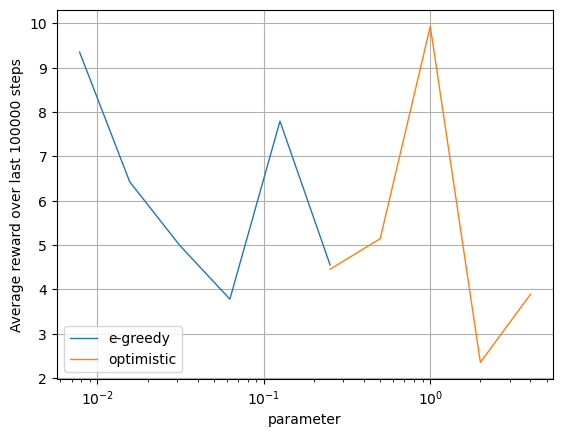

In [44]:
plt.semilogx(epsilons, rewards_e_greedy_average, label="e-greedy", linewidth=1)
plt.semilogx(qs, rewards_optimistic_average, label="optimistic", linewidth=1)
plt.xlabel('parameter')
plt.ylabel('Average reward over last 100000 steps')
plt.legend()
plt.grid(True)
plt.show()